In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from matplotlib import pyplot
import seaborn as sns

#Plotting 
from pandas.plotting import scatter_matrix

#Libraries for Statistical Models
import statsmodels.api as sm

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.expand_frame_repr = False

In [9]:

from datetime import datetime
import yfinance as yfin

# Loading the data
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['VIXCLS'] #, 'SP500', 'DJIA', 'VIXCLS']

start = datetime(2014, 1, 1)
end = datetime(2023, 12, 31)
# stk_data = web.get_data_yahoo(stk_tickers, start, end)
stk_data = yfin.download(stk_tickers, start, end)
ccy_data = web.DataReader(ccy_tickers, 'fred', start, end)
idx_data = web.DataReader(idx_tickers, 'fred', start, end)


[*********************100%%**********************]  3 of 3 completed


In [3]:
x = stk_data.loc[:, ('Adj Close', 'MSFT')].diff(5).shift(-5)
x.name = x.name[-1] + '_pred'
print( stk_data.loc[:, ('Adj Close', 'MSFT')].diff(5).head(6))
print(x.head(6))
print(len(x))

Date
2010-03-31        NaN
2010-04-01        NaN
2010-04-05        NaN
2010-04-06        NaN
2010-04-07        NaN
2010-04-08    0.48007
Name: (Adj Close, MSFT), dtype: float64
Date
2010-03-31    0.480070
2010-04-01    0.899187
2010-04-05    0.800129
2010-04-06    0.861090
2010-04-07    1.120173
2010-04-08    0.723932
Name: MSFT_pred, dtype: float64
470


In [26]:
return_period = 5
# print(ccy_data)
print(ccy_data.diff(return_period))

            DEXJPUS  DEXUSUK
DATE                        
2010-03-31      NaN      NaN
2010-04-01      NaN      NaN
2010-04-02      NaN      NaN
2010-04-05      NaN      NaN
2010-04-06      NaN      NaN
2010-04-07     0.19   0.0060
2010-04-08    -0.67  -0.0018
2010-04-09    -1.23   0.0174
2010-04-12    -1.07   0.0084
2010-04-13    -1.03   0.0186
2010-04-14    -0.58   0.0238
2010-04-15    -0.12   0.0193
2010-04-16    -1.25   0.0024
2010-04-19    -1.03  -0.0105
2010-04-20     0.50  -0.0041
2010-04-21     0.23  -0.0087
2010-04-22    -0.03  -0.0097
2010-04-23     2.15  -0.0032
2010-04-26     1.88   0.0203
2010-04-27    -0.27  -0.0090
2010-04-28     0.83  -0.0237
2010-04-29     1.15  -0.0065
2010-04-30     0.06  -0.0055
2010-05-03     0.62  -0.0224
2010-05-04     1.57  -0.0150
2010-05-05     0.23  -0.0026


In [77]:
xxx = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')])
xxx = pd.concat([xxx.diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
print(xxx.head())

           Adj Close                              
                MSFT      MSFT      MSFT      MSFT
Date                                              
2010-06-25 -0.074981 -0.050091 -0.171139 -0.172847
2010-06-28 -0.065284 -0.039521 -0.169489 -0.177408
2010-06-29 -0.100328 -0.074384 -0.211840 -0.223178
2010-06-30 -0.095270 -0.074512 -0.217478 -0.237838
2010-07-01 -0.076449 -0.076449 -0.198313 -0.232364


In [10]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'

X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1).dropna()

Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [5]:
pd.set_option('display.precision', 3)
dataset.describe()


,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,3080.000,3080.000,3.080e+03,3.080e+03,3.080e+03,3.080e+03,3080.000,3080.000,3080.000,3080.000
mean,0.004,0.003,6.085e-04,5.911e-04,-4.534e-04,9.467e-04,0.003,0.011,0.022,0.044
std,0.033,0.037,3.109e-02,1.266e-02,1.295e-02,1.545e-01,0.033,0.053,0.071,0.095
min,-0.179,-0.168,-2.312e-01,-5.245e-02,-1.112e-01,-5.591e-01,-0.179,-0.282,-0.299,-0.298
25%,-0.014,-0.017,-1.464e-02,-6.552e-03,-7.745e-03,-8.789e-02,-0.015,-0.019,-0.022,-0.019
50%,0.005,0.005,1.803e-03,7.013e-04,-5.475e-04,-1.103e-02,0.005,0.015,0.027,0.056
75%,0.023,0.023,1.768e-02,7.789e-03,7.558e-03,7.788e-02,0.023,0.044,0.068,0.107
max,0.164,0.230,1.753e-01,6.909e-02,7.540e-02,1.141e+00,0.164,0.245,0.285,0.377


In [11]:
dataset.tail()

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2023-03-02,0.005,0.012,-0.014,0.015,-6.177e-03,-0.076,-0.014,-0.058,0.065,-0.013
2023-03-03,-0.027,0.049,-0.007,-0.002,4.009e-03,-0.159,0.024,-0.030,0.098,0.023
2023-03-06,-0.012,0.057,-0.002,-0.002,9.965e-04,-0.118,0.026,-0.021,0.070,0.049
2023-03-07,0.026,0.041,-0.008,0.006,-1.971e-02,-0.055,0.019,-0.063,0.049,0.042
2023-03-08,0.045,0.042,-0.001,0.010,-1.651e-02,-0.074,0.030,-0.068,0.050,0.028


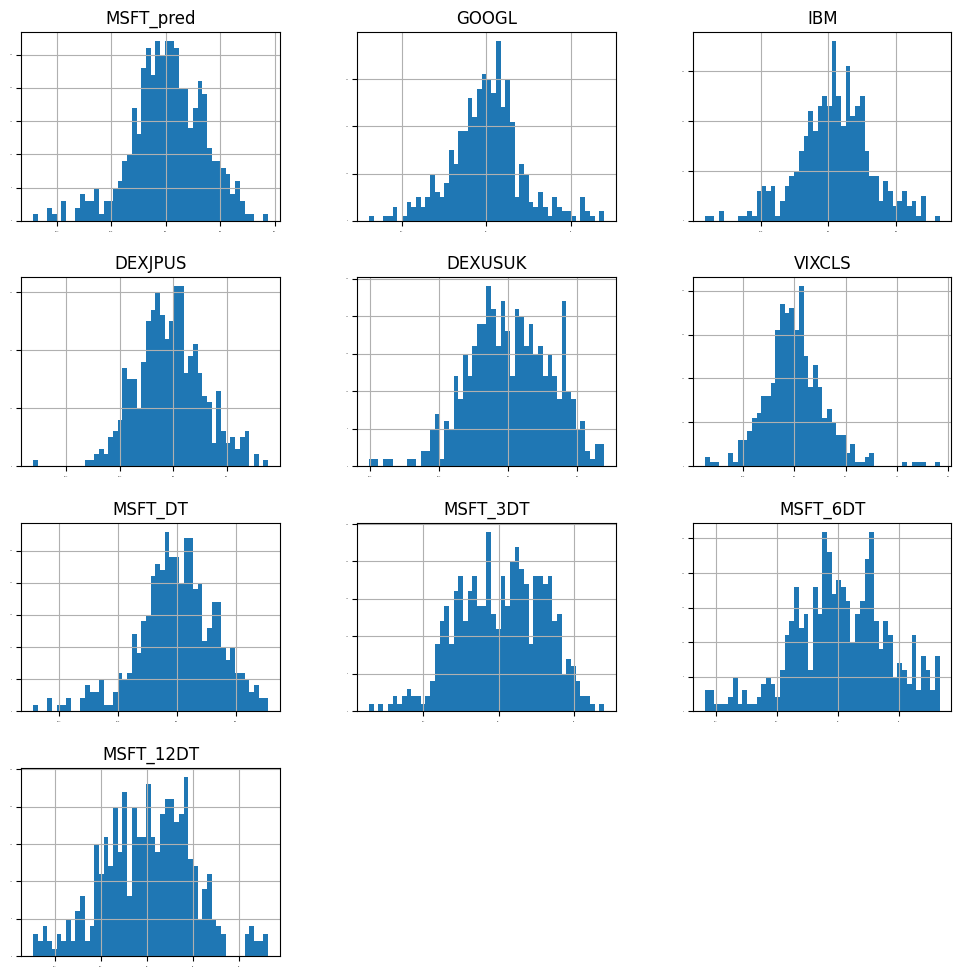

In [58]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

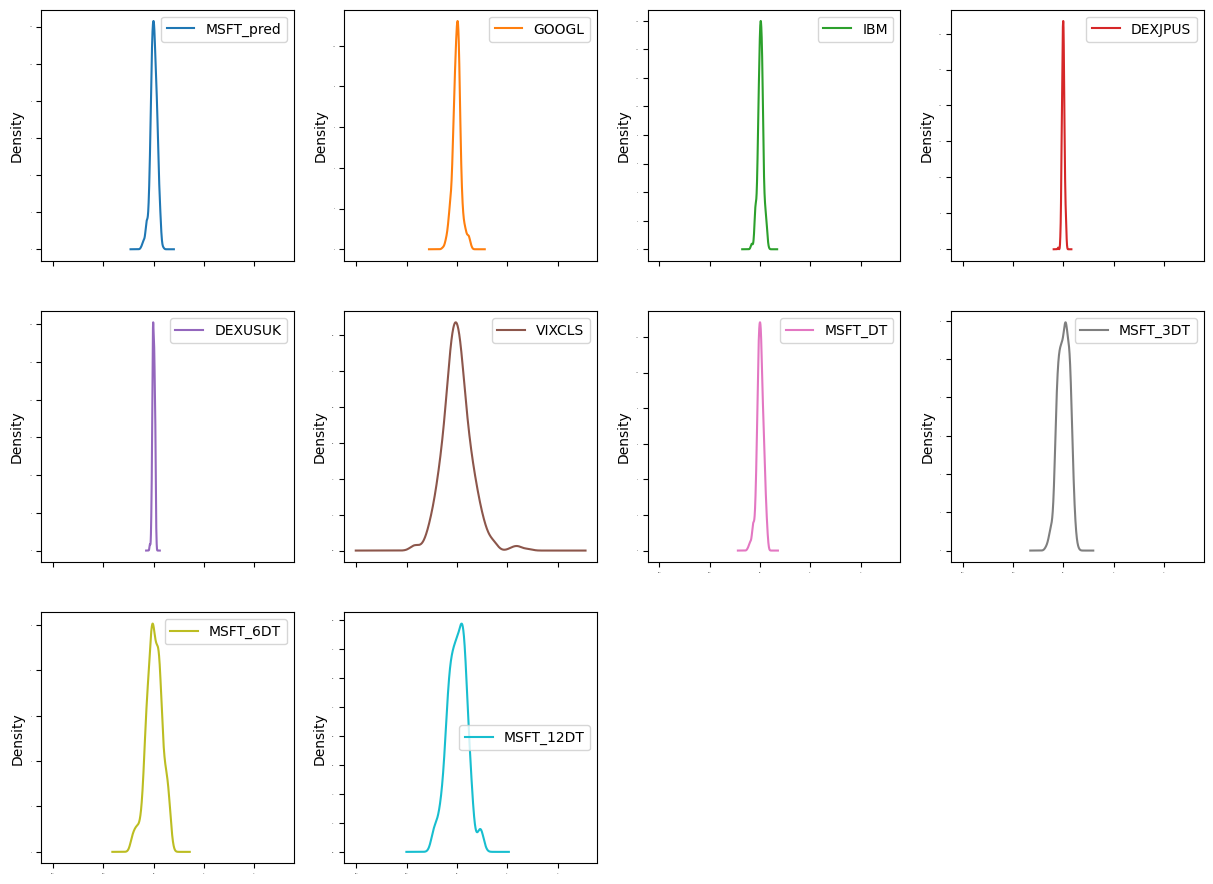

In [59]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

<Axes: title={'center': 'Correlation Matrix'}>

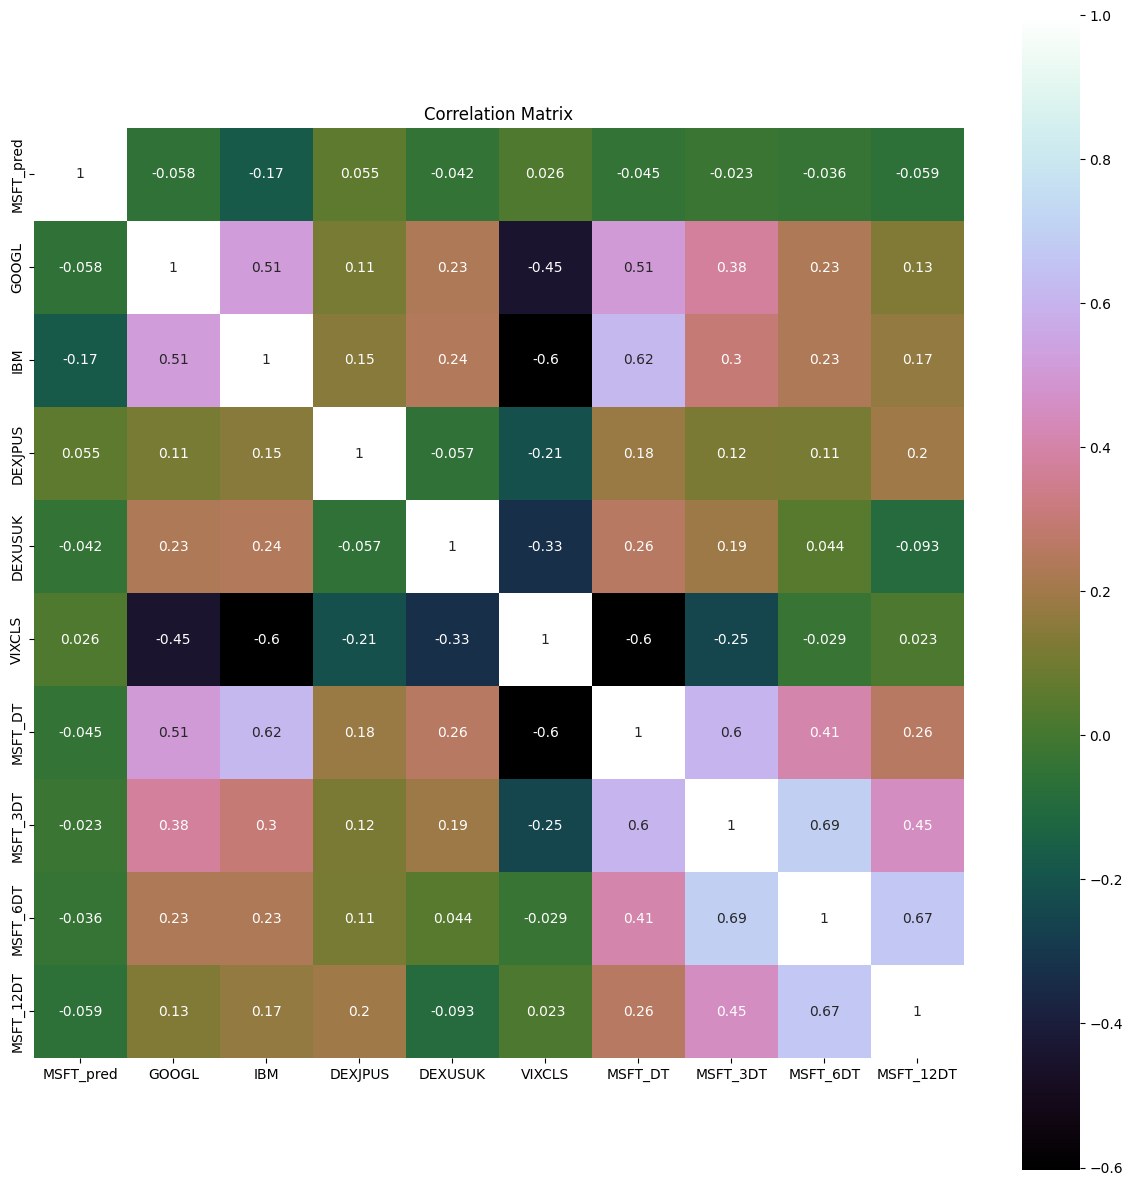

In [61]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

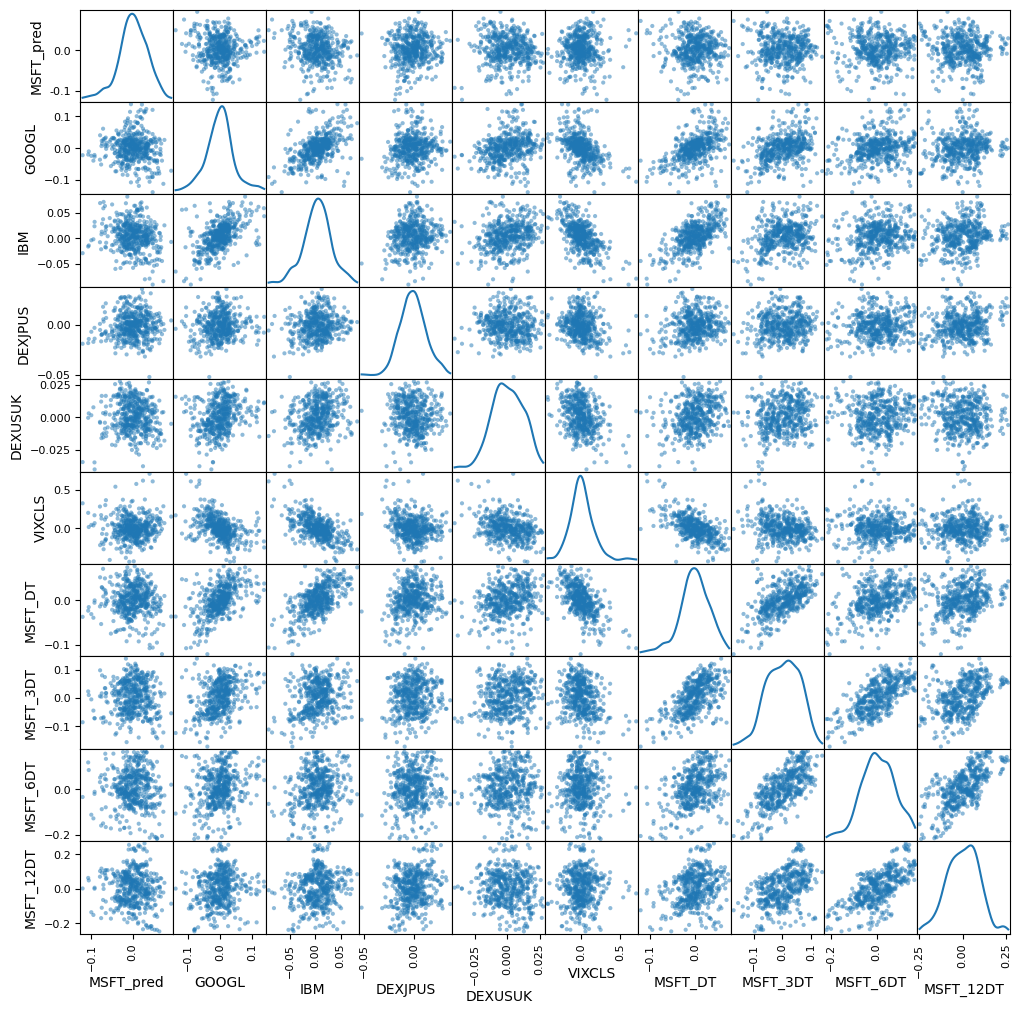

In [66]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12), diagonal='kde')
pyplot.show()

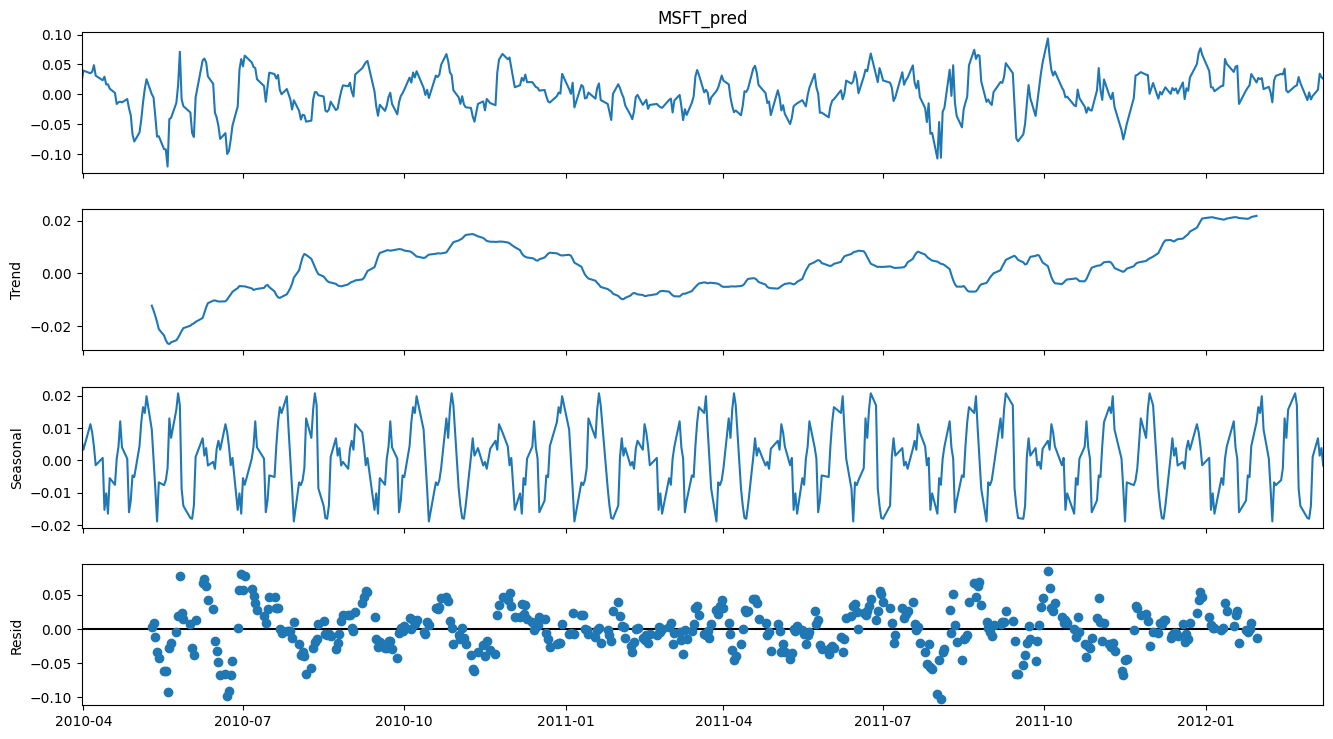

In [71]:
res = sm.tsa.seasonal_decompose(Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [4]:
validation_size = 0.2
train_size = int(len(X) * (1 - validation_size))
X_train, X_test = X.iloc[0:train_size].loc[:,['GOOGL', 'IBM', 'DEXJPUS', 'DEXUSUK', 'VIXCLS']], X.iloc[train_size:len(X)].loc[:,['GOOGL', 'IBM', 'DEXJPUS', 'DEXUSUK', 'VIXCLS']]
Y_train, Y_test = Y.iloc[0:train_size], Y.iloc[train_size:len(X)]
# X_train, X_test = X[0:train_size], X[train_size:len(X)]
# Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
print(f"{train_size}, {X.shape},{X_train.shape},{X_test.shape}")

2464, (3080, 9),(2464, 5),(616, 5)


In [90]:
print(X_train.head())

            GOOGL        IBM  DEXJPUS  DEXUSUK  VIXCLS
2010-03-31  0.017 -2.181e-03    0.016    0.018   0.002
2010-04-01  0.010 -7.690e-03    0.012    0.027  -0.052
2010-04-05  0.015  6.963e-04    0.017    0.021  -0.033
2010-04-06  0.010  2.641e-03    0.010    0.009  -0.054
2010-04-07 -0.006 -2.255e-03    0.002    0.004  -0.057


In [5]:
seq_len = 2
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]-seq_len+1, seq_len, X_train.shape[1]))
X_test_LSTM  = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:,i,:] = np.array(X_train)[i:X_train.shape[0]-seq_len+1+i, :]
    X_test_LSTM[:,i,: ]= np.array(X)[X_train.shape[0]-seq_len+i+1 : X.shape[0]-seq_len+1+i, :]


NameError: name 'Y_train' is not defined

In [11]:
import torch

features = ['GOOGL', 'IBM', 'DEXJPUS', 'DEXUSUK', 'VIXCLS']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
validation_size = 0.2
seq_len = 2

In [19]:
def create_dataset(X_data, Y_data, validation_size, seq_len):
    train_size = int(len(X_data) * (1 - validation_size))
    X_train = X_data.iloc[0:train_size].loc[:,['GOOGL', 'IBM', 'DEXJPUS', 'DEXUSUK', 'VIXCLS']]
    X_test  = X_data.iloc[train_size:len(X_data)].loc[:,['GOOGL', 'IBM', 'DEXJPUS', 'DEXUSUK', 'VIXCLS']]
    Y_train = Y_data.iloc[0:train_size]
    Y_test  = Y_data.iloc[train_size:len(Y_data)]

    Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
    X_train_LSTM = np.zeros((X_train.shape[0]-seq_len+1, seq_len, X_train.shape[1]))
    X_test_LSTM  = np.zeros((X_test.shape[0], seq_len, X_test.shape[1]))
    for i in range(seq_len):
        X_train_LSTM[:,i,:] = np.array(X_train)[i:X_train.shape[0]-seq_len+1+i, :]
        X_test_LSTM[:,i,: ]= (np.array(X_data.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'DEXUSUK', 'VIXCLS']])[X_train.shape[0]-seq_len+i+1 : X_data.shape[0]-seq_len+1+i, :])

    return (torch.tensor(X_train_LSTM, dtype=torch.float32, device=device), 
            torch.tensor(X_test_LSTM, dtype=torch.float32, device=device), 
            torch.tensor(Y_train_LSTM, dtype=torch.float32, device=device), 
            torch.tensor(Y_test_LSTM, dtype=torch.float32, device=device))

X_train_LSTM, X_test_LSTM, Y_train_LSTM, Y_test_LSTM = create_dataset(X, Y, validation_size, seq_len)
print(f"{X_train_LSTM.shape}, {X_test_LSTM.shape}, {Y_train_LSTM.shape}, {Y_test_LSTM.shape}")

torch.Size([2463, 2, 5]), torch.Size([616, 2, 5]), torch.Size([2463]), torch.Size([616])


In [12]:
from torch.utils.data import Dataset, DataLoader

class LSTMDataSet(Dataset):
    def __init__(self, X, Y, seq_len):
        self.X = X
        self.Y = Y
        self.seq_len = seq_len
    
    def __len__(self):
        return len(X) - seq_len + 1
    
    def __getitem__(self, idx):
        return (torch.tensor(np.array(X[idx: idx + seq_len].loc[:, features]), dtype=torch.float32),
                torch.tensor(np.array(Y[idx + seq_len - 1]), dtype=torch.float32))


train_size = int(len(X) * (1 - validation_size))
X_train = X.iloc[0:train_size].loc[:,features]
X_test  = X.iloc[train_size - seq_len + 1:len(X)].loc[:, features]
Y_train = Y.iloc[0:train_size]
Y_test  = Y.iloc[train_size - 1:len(Y)]



batch_size = 32
train_loader = DataLoader(LSTMDataSet(X_train, Y_train, seq_len), batch_size=batch_size)
test_loader = DataLoader(LSTMDataSet(X_test, Y_test, seq_len), batch_size=batch_size)

In [13]:
from torch import nn
class StockPricePredictionLSTM(nn.Module):
    def __init__(self, seq_len, input_size = 5, hidden_size = 5, num_layers=1):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        """
            input_size    : The number of expected features in the input x
            hidden_size   : The number of features in the hidden state h
            num_layers    : Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two LSTMs together to form a stacked LSTM, with the second LSTM taking in outputs of the first LSTM and computing the final results. Default: 1
            bias          : If False, then the layer does not use bias weights b_ih and b_hh. Default: True
            batch_first   : If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False
            dropout       : If non-zero, introduces a Dropout layer on the outputs of each LSTM layer except the last layer, with dropout probability equal to dropout. Default: 0
            bidirectional : If True, becomes a bidirectional LSTM. Default: False
            proj_size     : If > 0, will use LSTM with projections of corresponding size. Default: 0
        """
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc  = nn.Linear(hidden_size, 1)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(device)
        c_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(device)
        out, (h_out, _) = self.rnn(x, (h_0, c_0))

        fc_input = h_out[-1].view(-1, self.hidden_size)
        # fc_input1 = out[:, -1, :].view(-1, self.hidden_size)

        # print(fc_input)
        # print(fc_input1)

        return self.fc(fc_input)


In [18]:
num_epochs = 10000
learning_rate = 0.01

def train(model, trainX, trainY):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(trainX)
        loss = criterion(outputs, trainY)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch: {epoch + 1}, loss = {loss.item(): .5f}")

In [13]:
model = StockPricePredictionLSTM(seq_len, num_layers=2, hidden_size=5)
model = model.to(device)
X_train_LSTM = X_train_LSTM.to(device)
Y_train_LSTM = Y_train_LSTM.to(device)
train(model, X_train_LSTM, Y_train_LSTM)

NameError: name 'X_train_LSTM' is not defined

In [21]:
import math 
from sklearn.metrics import mean_squared_error
X_train_LSTM = X_train_LSTM.to(device)
Y_train_LSTM = Y_train_LSTM.to(device)
# eval
model.eval()
trainPredict = model(X_train_LSTM).cpu().detach().numpy()
testPredict  = model(X_test_LSTM).cpu().detach().numpy()

trainScore = math.sqrt(mean_squared_error(Y_train_LSTM.cpu().detach().numpy(), trainPredict.reshape(-1)))
testScore  = math.sqrt(mean_squared_error(Y_test_LSTM.cpu().detach().numpy(), testPredict.reshape(-1)))
print(f"Train RMSE: {trainScore:.2f}\nTest RMSE: {testScore:.8f}")

Train RMSE: 0.04
Test RMSE: 0.04047950


In [14]:
from tqdm import tqdm
epoch_num=20
def train_dl_method(model, dl):
    model.train()
    learning_rate = 0.01
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in tqdm(range(epoch_num)):
        for i, (x, y) in enumerate(tqdm(dl, leave=False)):
        # for i, (x, y) in enumerate(dl):
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            
        # if epoch == 0 or (epoch + 1) % 10 == 0:
            # print(f"Epoch: {epoch + 1}, loss = {loss.item(): .5f}")

In [15]:
model = StockPricePredictionLSTM(seq_len, num_layers=2, hidden_size=50)
model = model.to(device)
train_dl_method(model, train_loader)

100%|██████████| 20/20 [00:11<00:00,  1.76it/s]


In [13]:
print('ll')
for i, (x, y) in enumerate(train_loader):
    print(i)
    print(x.shape)
    print(y.shape)

ll
0
torch.Size([32, 2, 5])
torch.Size([32])
1
torch.Size([32, 2, 5])
torch.Size([32])
2
torch.Size([32, 2, 5])
torch.Size([32])
3
torch.Size([32, 2, 5])
torch.Size([32])
4
torch.Size([32, 2, 5])
torch.Size([32])
5
torch.Size([32, 2, 5])
torch.Size([32])
6
torch.Size([32, 2, 5])
torch.Size([32])
7
torch.Size([32, 2, 5])
torch.Size([32])
8
torch.Size([32, 2, 5])
torch.Size([32])
9
torch.Size([32, 2, 5])
torch.Size([32])
10
torch.Size([32, 2, 5])
torch.Size([32])
11
torch.Size([32, 2, 5])
torch.Size([32])
12
torch.Size([32, 2, 5])
torch.Size([32])
13
torch.Size([32, 2, 5])
torch.Size([32])
14
torch.Size([32, 2, 5])
torch.Size([32])
15
torch.Size([32, 2, 5])
torch.Size([32])
16
torch.Size([32, 2, 5])
torch.Size([32])
17
torch.Size([32, 2, 5])
torch.Size([32])
18
torch.Size([32, 2, 5])
torch.Size([32])
19
torch.Size([32, 2, 5])
torch.Size([32])
20
torch.Size([32, 2, 5])
torch.Size([32])
21
torch.Size([32, 2, 5])
torch.Size([32])
22
torch.Size([32, 2, 5])
torch.Size([32])
23
torch.Size([32,

In [7]:
# for .ipynb
from time import sleep
from tqdm.notebook import tqdm
for i in tqdm(range(3)):
    for j in tqdm(range(50000000)):
        pass
        # print(i," : ", j)
print("Done!")


## or for .py
from tqdm.notebook import tqdm
for i in tqdm(range(3)):
    for j in tqdm(range(50000000), leave=False):
        pass
        # print(i," : ", j)
print("Done!")

# from time import sleep
# # from tqdm import tqdm
# # from tqdm import tqdm_notebook as tqdm
# from tqdm.notebook import tqdm, tnrange
# for i in tnrange(3):
#     for j in tnrange(5000000):
#         pass
#         # print(i," : ", j)
# print("Done!")



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/50000000 [00:00<?, ?it/s]

  0%|          | 0/50000000 [00:00<?, ?it/s]

  0%|          | 0/50000000 [00:00<?, ?it/s]

Done!
